A partir del dataset que se propone, zoo.

+info: https://www.kaggle.com/uciml/zoo-animal-classification?select=zoo.csv

Responde a las preguntas presentadas

In [68]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [69]:
archivo = pd.read_csv('zoo.csv')
df = pd.DataFrame(archivo)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [70]:
#definimos el target
target = df['class_type']
target

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [71]:
# Separamos en un dataset los datos y en el otro el target
X = df.drop('class_type', axis = 1)
y = df['class_type']


<ipython-input-72-48e2722d70e9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr() # Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')


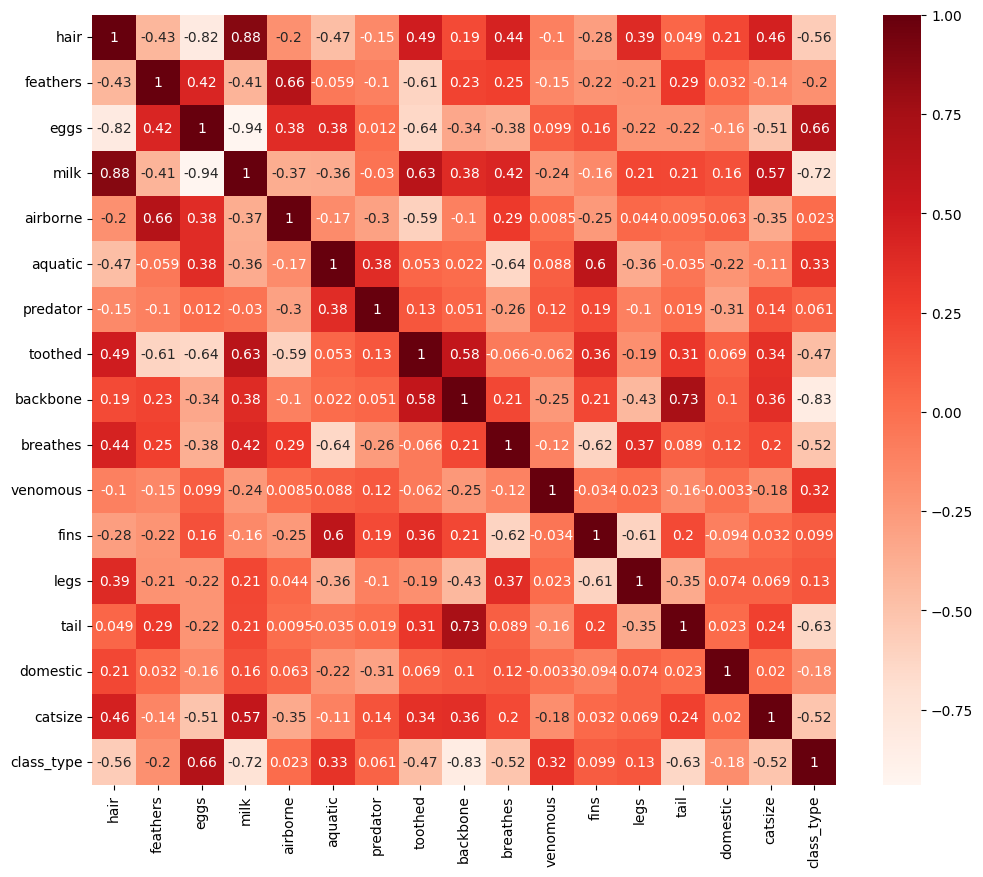

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,10))
cor = df.corr() # Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [73]:
# Correlación con la variable target
cor_target = abs(cor["class_type"])

In [74]:
# ¿Cuáles son las variables que más correlacionadas están?
relevant_features = cor_target[cor_target > 0.5]
relevant_features

hair          0.562384
eggs          0.661825
milk          0.723683
backbone      0.828845
breathes      0.519308
tail          0.631830
catsize       0.521030
class_type    1.000000
Name: class_type, dtype: float64

**PREGUNTAS**:
1. ¿Qué variables son las más correlacionadas con el target?

In [75]:
relevant_features

hair          0.562384
eggs          0.661825
milk          0.723683
backbone      0.828845
breathes      0.519308
tail          0.631830
catsize       0.521030
class_type    1.000000
Name: class_type, dtype: float64

2. ¿Qué variable tiene la correlación máxima y cual es su valor?

In [76]:
numero_max = relevant_features.sort_values().iloc[-2]
print(f'La variable que tiene la correlación maxima es Backbone y su valor es {numero_max}')

La variable que tiene la correlación maxima es Backbone y su valor es 0.8288452641993185


3. Aplicando backward elimination, ¿Con qué variables nos quedamos?

Nos quedaremos con todas las variables anteriores (relevant_features) para entrenar un modelo ya que su valor supera el 0,5 y se encuentran correlacionadas con "class_type".

4. ¿Cuál es el número óptimo de variables a tener en cuenta usando el método de RFE?, ¿cuáles son?

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [78]:
X = df.drop('class_type', axis = 1) # variables de predicción (X categorica)

# Codifico la variable X porque se trata de una variable categorica
# (con nombres) y nos saldria error al realizar el RFE. Para ello uso get_dummies(X)
X_codif = pd.get_dummies(X) # Variable X codificada

# Variables X y:
X = X_codif
y = df['class_type'] # Objetivo

modelo = LogisticRegression(max_iter = 1000 )
rfe = RFE(modelo, n_features_to_select=4) #Ajustamos con n_features_to_select las variables al objetivo




In [79]:
fit = rfe.fit(X, y)
print(fit.ranking_)

optimal_num_features = fit.n_features_ # Buscamos el numero optimo de variables
print(f"Número óptimo de variables: {optimal_num_features}")

[  3   1   7   1   6   8  11   2   1   1  12   4   9   5  28  10  87 103
  49  86  92 105 112  59  50  79  96  76  51  31  55  33  64 108  46  30
  77  65 107  73  23  14  74 106 102  41 113  91  62  58  85  84  63  52
  44  54  32  26  67 101 100  34  94  89  81  95  53  18  25  82 104  40
  78  37  68  45  48  27  38  93 111  29  97 109  98 110  36  15  56  70
  90  16  35  60  61  19  20  57  66  80  42  39  72  24  22  13  17  47
  75  83  71  88  43  99  21  69]
Número óptimo de variables: 4


In [80]:
selected_features = X_codif.columns[fit.support_] #Obtengo las variables seleccionadas
print(selected_features)

Index(['feathers', 'milk', 'backbone', 'breathes'], dtype='object')


5. ¿Cuántas variables elimina RIDGE y cúales son?¿Y LASSO?

In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [82]:
# Uso las variables anteriores X y
escalar = StandardScaler()
X_escalado = escalar.fit_transform(X)

# Iniciamos el modelo Ridge:
modeloRidge = Ridge(alpha=1.0)
# Ajustamos modelo
modeloRidge.fit(X_escalado, y)
#Calculamos el coeficiente Ridge
coef_ridge = modeloRidge.coef_
print(f'Los coeficientes de Ridge son: {coef_ridge}')

Los coeficientes de Ridge son: [-0.20878577 -0.24774786  0.25323181 -0.32004079 -0.0758131   0.09399083
 -0.00077474 -0.14229774 -0.47289645 -0.23573641  0.02946346  0.03607274
  0.12765795 -0.30192299 -0.05834717 -0.19517856 -0.08839884 -0.02084332
  0.01827722 -0.08839884 -0.02069049 -0.02084332 -0.00376009  0.03520763
  0.01827722 -0.1100635  -0.02069049 -0.03771946  0.01827722  0.12372361
  0.07973682  0.06736422 -0.05464986 -0.02084332  0.05687228 -0.06604157
 -0.03771946 -0.07404428 -0.02084332 -0.01620763  0.0453597   0.11952233
 -0.02960126 -0.02084332 -0.05894301  0.06282422 -0.00376009 -0.07617908
 -0.07389145  0.01812439 -0.04235515 -0.05943838 -0.05464986  0.01827722
  0.11061199  0.10422572 -0.07211438  0.06297706 -0.05480269 -0.02069049
 -0.02069049  0.06736422 -0.02069049 -0.03993208 -0.05928555 -0.02069049
  0.10422572  0.15798941  0.09358668 -0.05928555 -0.02084332 -0.03367215
 -0.03771946 -0.05276091 -0.05480269  0.05687228  0.01827722 -0.00481823
 -0.1188366  -0.0206

In [83]:
# Contar variables eliminadas por Ridge (coeficientes cercanos a cero)
variables_ridge_elim = X.columns[abs(coef_ridge) < 0.1]
num_variables_ridge_elim = len(variables_ridge_elim)
print(f'El numero de variables es {num_variables_ridge_elim} y son {variables_ridge_elim}')

El numero de variables es 95 y son Index(['airborne', 'aquatic', 'predator', 'venomous', 'fins', 'domestic',
       'animal_name_aardvark', 'animal_name_antelope', 'animal_name_bass',
       'animal_name_bear', 'animal_name_boar', 'animal_name_buffalo',
       'animal_name_calf', 'animal_name_carp', 'animal_name_catfish',
       'animal_name_cheetah', 'animal_name_chicken', 'animal_name_chub',
       'animal_name_crab', 'animal_name_crayfish', 'animal_name_crow',
       'animal_name_deer', 'animal_name_dogfish', 'animal_name_dolphin',
       'animal_name_dove', 'animal_name_duck', 'animal_name_elephant',
       'animal_name_flamingo', 'animal_name_flea', 'animal_name_fruitbat',
       'animal_name_giraffe', 'animal_name_girl', 'animal_name_gnat',
       'animal_name_goat', 'animal_name_gorilla', 'animal_name_gull',
       'animal_name_haddock', 'animal_name_hamster', 'animal_name_hare',
       'animal_name_hawk', 'animal_name_herring', 'animal_name_kiwi',
       'animal_name_ladybird',

In [84]:
# Lasso:
modeloLasso = Lasso(alpha=1.0)
#Ajustamos el modelo:
modeloLasso.fit(X_escalado, y)
# Sacamos coeficientes de Lasso:
coef_Lasso = modeloLasso.coef_

#Variables eliminadas por Lasso (coeficientes iguales a 0):
variables_lasso_elim= X.columns[coef_Lasso == 0]
num_variables_lasso_elim = len(variables_lasso_elim)
print(f'El numero de variables es {num_variables_lasso_elim} y son {variables_lasso_elim}')

El numero de variables es 114 y son Index(['hair', 'feathers', 'eggs', 'airborne', 'aquatic', 'predator',
       'toothed', 'breathes', 'venomous', 'fins',
       ...
       'animal_name_tuatara', 'animal_name_tuna', 'animal_name_vampire',
       'animal_name_vole', 'animal_name_vulture', 'animal_name_wallaby',
       'animal_name_wasp', 'animal_name_wolf', 'animal_name_worm',
       'animal_name_wren'],
      dtype='object', length=114)


6. ¿Usando PCA con 2 componentes, qué peso tiene la variable "domestic" en la componente 1?

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [86]:
#Inicializar modelo PCA con 2 componentes:
pca = PCA(n_components=2)
#Ajustamos
pca.fit(X_escalado)
# Ahora obtendríamos las combinaciones (loadings) de las variables en las componentes principales
loadings_component_1 = pca.components_[0]
# Mostrar combinaciones (loadings) para la variable "domestic"
variable_index = X.columns.get_loc('domestic')
peso_domestic = loadings_component_1[variable_index]
print(f"Peso de la variable 'domestic' en la componente 1: {peso_domestic}")

Peso de la variable 'domestic' en la componente 1: -0.08780045860167919


7. ¿Cuántos coeficientes se obtienen en LDA (no uses n_components), y cuáles son sus valores?

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#El Análisis Discriminante Lineal (LDA) es un método que busca maximizar la separación entre las clases en un conjunto de datos.

In [88]:
# Inicializamos el modelo LDA y lo ajustamos:
lda = LinearDiscriminantAnalysis()
lda.fit(X_escalado, y)

# Sacamos los coeficientes de las funciones discriminadas:
coef_lda = lda.scalings_
# Cantidad de coeficientes
num_coef_lda = len(coef_lda)

print(f'Coeficientes de las funciones discriminantes lineales: \n {num_coef_lda} \n y sus valores son: {coef_lda}')


Coeficientes de las funciones discriminantes lineales: 
 116 
 y sus valores son: [[-9.71265631e-16  2.59227918e-15 -5.37590139e-16]
 [-1.01216664e+16 -4.59737221e+15  2.62658754e+14]
 [ 1.46082340e-14  2.94338695e-16 -4.22676987e-15]
 [-8.07233699e+15 -2.40721047e+14  1.64274245e+15]
 [-3.81593076e-15 -1.28154684e-16 -3.29886653e-16]
 [-1.27015825e-15  2.62525828e-17  2.55601137e-15]
 [ 2.22775817e-16  4.99620326e-16  1.61414952e-15]
 [-4.46832606e-16  1.71620328e-15 -3.31199398e-16]
 [-1.58505833e+15  4.84232969e+15 -1.32446145e+15]
 [ 4.65865869e-15  4.80237816e-16 -2.73220472e-15]
 [ 1.62416920e-15 -9.39014352e-15 -8.03963645e-15]
 [ 5.30470199e-16 -1.81335065e-16  2.83028484e-15]
 [ 2.30136589e-15 -2.74668543e-16 -1.92502576e-15]
 [ 3.82297724e-15  2.31033144e-15 -2.97066177e-16]
 [ 5.23783007e-16  8.79512285e-16 -6.55733216e-16]
 [-9.11884175e-16  3.37006650e-17  1.36348300e-15]
 [ 6.60252651e-17  5.44752616e-16 -7.87408791e-16]
 [-1.86567873e-16  2.00430464e-16 -8.21510123e-16]
